<a href="https://colab.research.google.com/github/AryanKhubchandani/information-extraction-medical/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install spacy

In [ ]:
pip install scispacy

  Using cached spacy-3.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-ner-bc5cdr-md 0.5.1 requires spacy<3.5.0,>=3.4.1, but you have spacy 3.6.1 which is incompatible.


In [ ]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz (120.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.4.4 which is incompatible.
scispacy 0.5.3 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.4.4 which is incompatible.


In [ ]:
!pip install sklearn

In [ ]:
import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")

In [ ]:
import pandas as pd
import re

transcripts_dataset = pd.read_csv("/content/mtsamples.csv", index_col=0)
transcripts_dataset.dropna(subset=['transcription'], inplace=True)
sample_transcription = transcripts_dataset['transcription'].iloc[0]
transcripts_dataset['transcription'] = transcripts_dataset['transcription'].apply(lambda x: re.sub('(\.,)', ". ", x))

In [ ]:
import re
f = open("/content/trans2.txt", "r")
sample_transcription = f.read()
sample_transcription

sample_transcription = re.sub('(\.,)', ". ", sample_transcription)
sample_transcription

'Doctor: Raman Location: Delhi This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up. MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra. ALLERGIES: , She has no known medicine allergies. OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78. HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear. Neck:  Supple with

In [ ]:
doc = nlp(sample_transcription)
print("TEXT", "START", "END", "ENTITY TYPE")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

TEXT START END ENTITY TYPE
complaint of allergies 74 96 DISEASE
allergies 116 125 DISEASE
Claritin 216 224 CHEMICAL
Zyrtec 230 236 CHEMICAL
asthma 536 542 DISEASE
Tri-Cyclen 682 692 CHEMICAL
throat 841 847 DISEASE
adenopathy 1003 1013 DISEASE
Allergic rhinitis 1044 1061 DISEASE
Zyrtec 1086 1092 CHEMICAL
loratadine 1150 1160 CHEMICAL
Nasonex 1253 1260 CHEMICAL


In [ ]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
from spacy.matcher import Matcher

sample_transcription = re.sub('(\.,)', ". ", sample_transcription)
pattern = [{'ENT_TYPE':'CHEMICAL'}, {'LIKE_NUM': True}, {'IS_ASCII': True}]
matcher = Matcher(nlp.vocab)
matcher.add("DRUG_DOSE", [pattern])

regex_doc = re.compile(r'(doctor|doc|dr).?\s([a-z]+)\s?([a-z]+)?', re.IGNORECASE)
regex_location = re.compile(r'(location).?\s([a-z]+)', re.IGNORECASE)

doctors = regex_doc.search(sample_transcription)
locations = regex_location.search(sample_transcription)

print("Doctors: ", doctors)
print("Locations: ", locations)

Doctors:  <re.Match object; span=(0, 22), match='Doctor: Raman Location'>
Locations:  <re.Match object; span=(14, 29), match='Location: Delhi'>


In [ ]:
doc = nlp(sample_transcription)
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(string_id, start, end, span.text)

DRUG_DOSE 256 259 Nasonex two sprays


In [ ]:
chem_test_f = open("/content/TestSet.tmChem.PubTator.txt", "r")
dis_test_f = open("/content/TestSet.DNorm.PubTator.txt", "r")

In [ ]:
r = 0.3
u = 0.1
l = 20

In [ ]:
chem_test_sets = []
t = []
for i in chem_test_f.readlines():
  if i=="\n":
    chem_test_sets.append(t)
    t = []
  else:
    t.append(i)

In [ ]:
dis_test_sets = []
t = []
for i in dis_test_f.readlines():
  if i=="\n":
    dis_test_sets.append(t)
    t = []
  else:
    t.append(i)

In [ ]:
test_inputs = []
for data in chem_test_sets:
  if data==[]:continue
  raw = data[1]
  input = ''
  x = 0
  for i in raw:
    if i=="|":
      x+=1
    elif x>=2:
      input += i
  test_inputs.append(input)


In [ ]:
chem_test_outputs = []
dis_test_outputs = []

for data in chem_test_sets:
  if data!=[]:
    temp = []
    for row in range(2, len(data)):
        x = data[row].split('\t')
        temp.append(x[3])
    chem_test_outputs.append(temp)

for data in dis_test_sets:
  if data!=[]:
    temp = []
    for row in range(2, len(data)):
        x = data[row].split('\t')
        temp.append(x[3])
    dis_test_outputs.append(temp)

In [ ]:
# test_sets
# test_inputs
chem_test_outputs
dis_test_outputs

[['delirium', 'ulcers', 'delirium', 'delirium'],
 ['hypotension'],
 ['scleroderma renal crisis',
  'Scleroderma renal crisis',
  'SRC',
  'systemic sclerosis',
  'SSc',
  'SRC',
  'thrombotic microangiopathy',
  'SSc',
  'SRC',
  'SSc'],
 ['psychosis',
  'psychosis',
  'psychosis',
  'psychosis',
  'Axis I psychiatric disorders',
  'psychotic symptoms',
  'psychotic symptoms',
  'depressive disorder',
  'bipolar disorder',
  'antisocial personality disorder',
  'psychosis',
  'depressive disorder',
  'antisocial personality disorder',
  'psychosis',
  'psychosis',
  ', antisocial personality',
  'psychotic symptoms'],
 ["Parkinson's disease",
  'dyskinetic',
  "Parkinson's disease",
  'PD',
  'levodopa-induced dyskinesias',
  'LIDs',
  'LIDs',
  'LIDs',
  'LIDs',
  'abnormal involuntary movements'],
 ['cystitis',
  'cystitis',
  'pain behaviors',
  'pain behaviors',
  'bladder instability',
  'edema',
  'cystitis'],
 ['hepatitis', 'hepatitis', 'hepatitis', 'hepatic injury'],
 ['multipl

In [ ]:
# intersection of 2 lists with duplicates using Counter
from collections import Counter
def intersection(a, b):
    a = Counter(a); b = Counter(b)
    c = 0
    for i in a:
        if i in b:
            c += min(a[i], b[i])
    return c

# subtraction of 2 lists with duplicates using Counter
def subtraction(a, b):
    a = Counter(a); b = Counter(b)
    c = 0
    for i in a:
        if i in b:
            c += max(a[i] - b[i], 0)
        else:
            c += a[i]
    return c

In [ ]:
tp = fp = fn = tn = total = 0

In [ ]:
precision = recall = r; f1 = u

In [ ]:
tp_lst = []; fp_lst = []; fn_lst = []; tot_lst = []
tp_lst_1 = []; fp_lst_1 = []

In [ ]:
for i in range(len(test_inputs)):
  input = test_inputs[i]
  output = nlp(input)

  chem_expected_outputs = chem_test_outputs[i]
  dis_expected_outputs = dis_test_outputs[i]

  chem_op = []
  dis_op = []

  for ent in output.ents:
    text = ent.text.split(' ')[-1]
    if ent.label_=="CHEMICAL":
      chem_op.append(text)
    else:
      dis_op.append(text)

  tp += intersection(chem_op, chem_expected_outputs) + intersection(dis_op, dis_expected_outputs)
  tp_lst_1.append(intersection(chem_op, chem_expected_outputs) + intersection(dis_op, dis_expected_outputs))
  tp_lst.append(tp)
  fp += subtraction(chem_op, chem_expected_outputs) + subtraction(dis_op, dis_expected_outputs)
  fp_lst_1.append(subtraction(chem_op, chem_expected_outputs) + subtraction(dis_op, dis_expected_outputs))
  fp_lst.append(fp)
  fn += subtraction(chem_expected_outputs, chem_op) + subtraction(dis_expected_outputs, dis_op) - l
  fn_lst.append(fn)
  total += len(output.ents)
  tot_lst.append(total)

In [ ]:
tp, fp, fn, total

(319, 422, 684, 741)

In [ ]:
tp_fp = [tp_lst[i]+fp_lst[i] for i in range(len(tp_lst))]
tp_fn = [tp_lst[i]+fn_lst[i] for i in range(len(tp_lst))]

In [ ]:
# tp_lst
# fp_lst
# fn_lst
# tot_lst

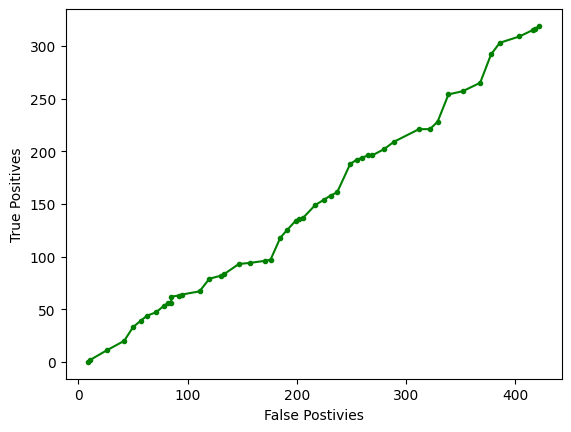

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel("False Postivies")
plt.ylabel("True Positives")
plt.plot(np.array(fp_lst), np.array(tp_lst),marker='.', color='g')
plt.show()

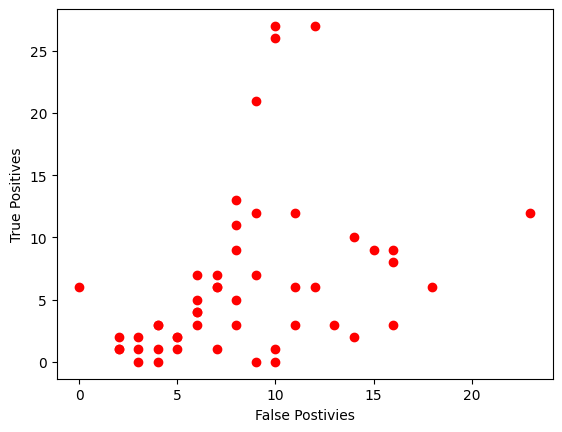

In [ ]:
plt.xlabel("False Postivies")
plt.ylabel("True Positives")
plt.scatter(np.array(fp_lst_1), np.array(tp_lst_1), color='r')
plt.show()

In [ ]:
precision += tp / (tp + fp)
recall += tp / (tp + fn)
f1 += 2 * precision * recall / (precision + recall)


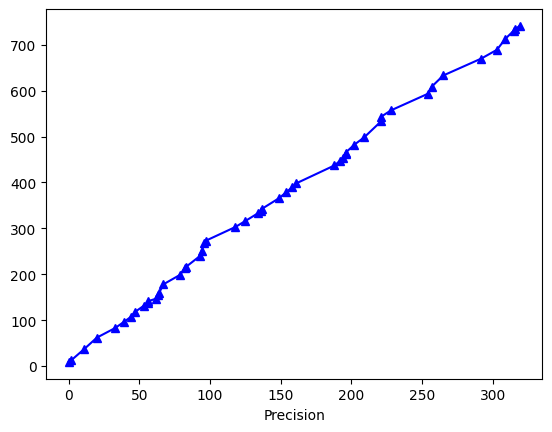

In [ ]:
plt.xlabel("Precision")
plt.plot(np.array(tp_lst), np.array(tp_fp),marker='^', color='b')
plt.show()

In [ ]:
print("precision: %.4f" % precision)
print("recall: %.4f" % recall)
print("f1: %.4f" % f1)

precision: 0.7305
recall: 0.7180
f1: 0.8242
